In [16]:
# 导入必要的库
from sklearn.datasets import load_iris  # 用于加载鸢尾花数据集
from sklearn.model_selection import train_test_split  # 用于分割数据集为训练集和测试集
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 模型评估指标
from sklearn import tree  # 用于决策树的可视化
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns # 绘制热力图

In [9]:

# 1. 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征矩阵，包含四个特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度
y = iris.target  # 目标向量，包含三个类别标签：0-山鸢尾，1-变色鸢尾，2-维吉尼亚鸢尾

# 特征名称和目标类别名称（便于理解）
feature_names = iris.feature_names
target_names = iris.target_names

# 打印部分数据和特征名称（可选）
print("特征名称:", feature_names)
print("目标类别名称:", target_names)
print("数据集前5个样本特征:")
print(X[:5])
print("数据集前5个样本标签（数字表示）:", y[:5])


特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
目标类别名称: ['setosa' 'versicolor' 'virginica']
数据集前5个样本特征:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
数据集前5个样本标签（数字表示）: [0 0 0 0 0]


In [11]:
# 2. 将数据集分为训练集和测试集
# test_size=0.3 表示30%的数据用于测试，70%用于训练
# random_state=42 确保每次分割的数据相同，便于结果复现
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify=y 保持各类别在训练集和测试集中的比例一致
)

print("\n训练集样本数量:", len(X_train))
print("测试集样本数量:", len(X_test))



训练集样本数量: 105
测试集样本数量: 45


In [12]:
# 3. 创建决策树分类器
# criterion='entropy' 表示使用信息熵作为分割标准
# max_depth=3 限制树的最大深度为3，防止过拟合
# random_state=42 确保结果可复现
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)


In [13]:

# 4. 训练模型
# 使用训练集数据来训练决策树模型
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [15]:

# 5. 在测试集上进行预测
# 使用训练好的模型对测试集进行预测
y_pred = clf.predict(X_test)
print(y_pred)

[2 1 2 2 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 2 0 2 0 0
 0 0 2 1 0 2 2 1]


In [17]:

# 6. 模型评估

# 6.1 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("\n模型准确率: {:.2f}%".format(accuracy * 100))

# 6.2 打印分类报告
# 包含精确率（precision）、召回率（recall）、F1分数（F1-score）
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))



模型准确率: 93.33%

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [18]:

# 6.3 打印混淆矩阵
# 混淆矩阵用于展示预测结果与真实标签的对应关系
cm = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(cm)



混淆矩阵:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


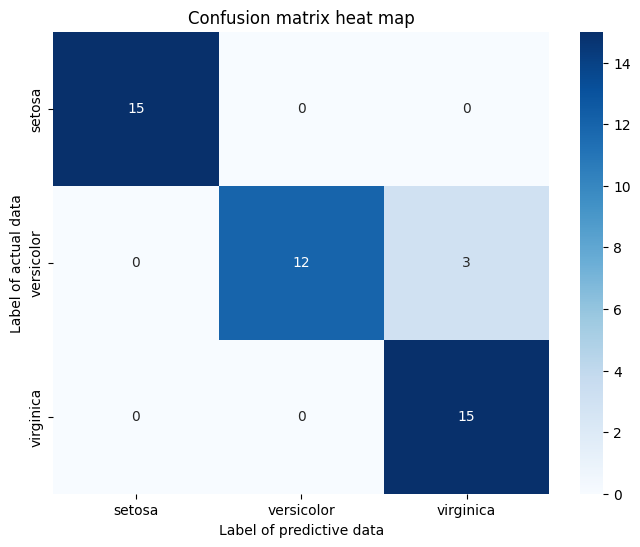

In [20]:

# 可视化混淆矩阵
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Label of predictive data')
plt.ylabel('Label of actual data')
plt.title('Confusion matrix heat map')
plt.show()


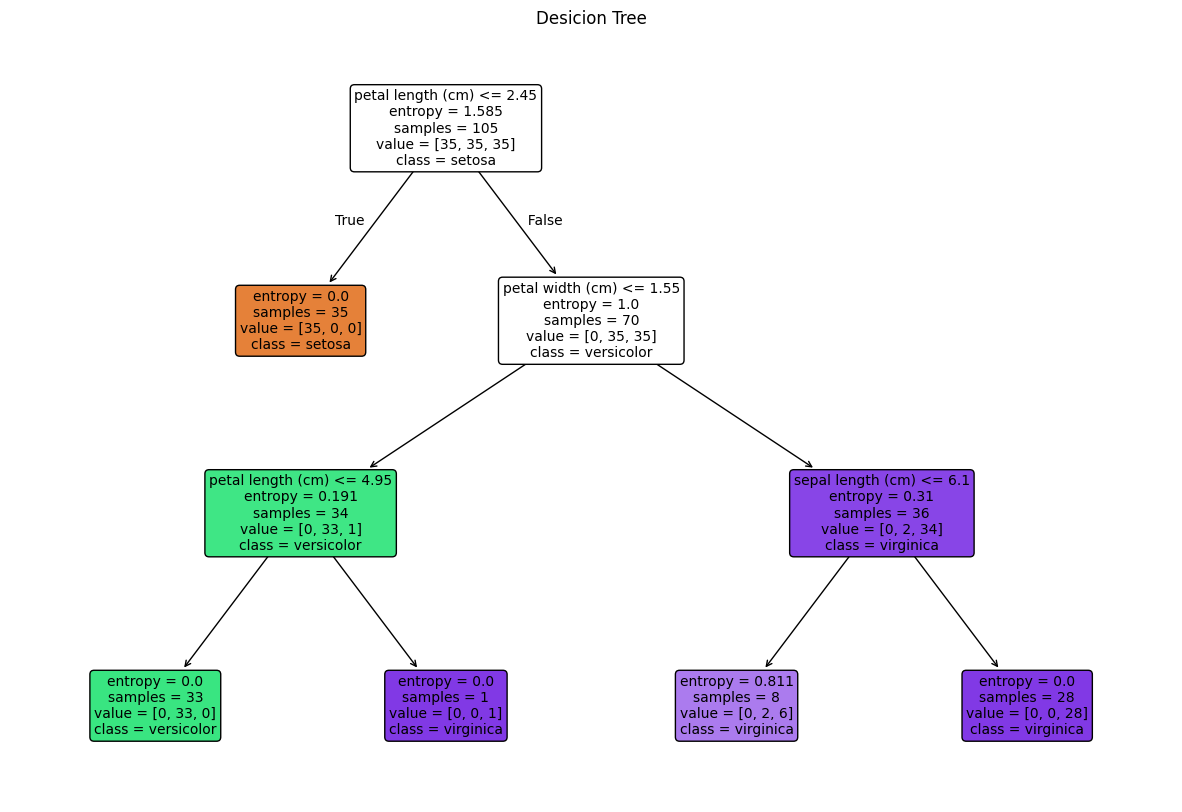

In [22]:

# 7. 决策树的可视化

# 使用内置的plot_tree函数绘制决策树
plt.figure(figsize=(15,10))
tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,  # 填充颜色以表示类别
    rounded=True,  # 节点边框圆润
    fontsize=10
)
plt.title("Desicion Tree")
plt.show()

# 或者，导出为Graphviz格式并生成更美观的图像（需要安装Graphviz）
# 注意：以下代码会生成一个PDF文件，并在默认查看器中打开
# 如果不需要，可以注释掉这部分代码


In [ ]:

"""
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # 这将在当前目录生成一个PDF文件
graph.view()  # 在默认查看器中打开生成的决策树
"""

In [ ]:

# 特征名称和目标类别名称（便于理解）
feature_names = iris.feature_names
target_names = iris.target_names

# 打印部分数据和特征名称（可选）
print("特征名称:", feature_names)
print("目标类别名称:", target_names)
print("数据集前5个样本特征:")
print(X[:5])
print("数据集前5个样本标签（数字表示）:", y[:5])

# 2. 将数据集分为训练集和测试集
# test_size=0.3 表示30%的数据用于测试，70%用于训练
# random_state=42 确保每次分割的数据相同，便于结果复现
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify=y 保持各类别在训练集和测试集中的比例一致
)

print("\n训练集样本数量:", len(X_train))
print("测试集样本数量:", len(X_test))

# 3. 创建决策树分类器
# criterion='entropy' 表示使用信息熵作为分割标准
# max_depth=3 限制树的最大深度为3，防止过拟合
# random_state=42 确保结果可复现
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)

# 4. 训练模型
# 使用训练集数据来训练决策树模型
clf.fit(X_train, y_train)

# 5. 在测试集上进行预测
# 使用训练好的模型对测试集进行预测
y_pred = clf.predict(X_test)

# 6. 模型评估

# 6.1 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("\n模型准确率: {:.2f}%".format(accuracy * 100))

# 6.2 打印分类报告
# 包含精确率（precision）、召回率（recall）、F1分数（F1-score）
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6.3 打印混淆矩阵
# 混淆矩阵用于展示预测结果与真实标签的对应关系
cm = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(cm)

# 可视化混淆矩阵
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()

# 7. 决策树的可视化

# 使用内置的plot_tree函数绘制决策树
plt.figure(figsize=(15,10))
tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,  # 填充颜色以表示类别
    rounded=True,  # 节点边框圆润
    fontsize=10
)
plt.title("决策树结构")
plt.show()

# 或者，导出为Graphviz格式并生成更美观的图像（需要安装Graphviz）
# 注意：以下代码会生成一个PDF文件，并在默认查看器中打开
# 如果不需要，可以注释掉这部分代码

"""
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # 这将在当前目录生成一个PDF文件
graph.view()  # 在默认查看器中打开生成的决策树
"""